# Transformers

## Introduction to Transformers

### Some background ideas

* [1953] "Cloze procedure" or "Cloze task" ([Taylor, 1953](https://gwern.net/doc/psychology/writing/1953-taylor.pdf)) measurement of readability, a "cloze", is a psychological observation that the human mind seeks to close gaps (i.e., complete patterns). From the paper, "Chickens cackle and ________ quack." = 'ducks'

* [2013] Mikolov, Tomas, et al. “Efficient Estimation of Word Representations in Vector Space.” arXiv:1301.3781 [Cs], Sept. 2013. arXiv.org, http://arxiv.org/abs/1301.3781.

* [2014] Pennington, Jeffrey, et al. “Glove: Global Vectors for Word Representation.” Proceedings of the 2014 Conference on Empirical Methods in Natural Language Processing (EMNLP), Association for Computational Linguistics, 2014, pp. 1532–43. DOI.org (Crossref), https://doi.org/10.3115/v1/D14-1162.

* [2017] Vaswani, Ashish, et al. Attention Is All You Need. arXiv:1706.03762, arXiv, 5 Dec. 2017. arXiv.org, https://doi.org/10.48550/arXiv.1706.03762.

* [2018] Peters, Matthew E., et al. Deep Contextualized Word Representations. arXiv:1802.05365, 22 Mar. 2018. arXiv.org, https://doi.org/10.48550/arXiv.1802.05365.
    - "[Representing text in vectors] should ideally model both (1) complex characteristics of word use (e.g., syntax and semantics), and (2) how these uses vary across linguistic contexts (i.e., to model polysemy)."
    - Deep contextualized embeddings
    - Elmo representations (LSTM) - "higher LSTM states capture context-dependent aspects of word meaning ... while lower-level states model aspects of syntax ..."
    - Representations are features (feature based modeling)

* [2018] Radford, Alec, et al. Improving Language Understanding by Generative Pre-Training. [OpenAI](https://cdn.openai.com/research-covers/language-unsupervised/language_understanding_paper.pdf)
    - Generative Pre-trained Transformer (GPT) trained on all pre-trained parameters
    - discriminative fine-tuning

* [2018] Devlin, Jacob, et al. BERT: Pre-Training of Deep Bidirectional Transformers for Language Understanding. arXiv:1810.04805, arXiv, 24 May 2019. arXiv.org, https://doi.org/10.48550/arXiv.1810.04805.
    - bidirectional fine-tuning based approaches
    - Masked language model training objective (Cloze task)
    - Next sentence prediction training task


### Key ideas

<center><img src="./images/Transformer.png" height="500" width="400"></center>

#### Encoder

The encoder in the Transformer architecture processes the input sequence. It consists of a stack of identical layers, each containing two main subcomponents: a multi-head self-attention mechanism and a position-wise fully connected feed-forward network. The multi-head attention mechanism allows the model to focus on different positions of the input sequence simultaneously, effectively capturing various aspects of the contextual relationship. The position-wise feed-forward networks apply linear transformations to each position separately and identically.

<center><img src="https://raw.githubusercontent.com/nlp-with-transformers/notebooks/48e4a5e5c44b86e1593c0945a49af9675cfd7158//images/chapter03_encoder-zoom.png" height="600" width="800"></center>

#### Decoder

The decoder also consists of a stack of identical layers but with an additional sub-layer that performs multi-head attention over the output of the encoder stack. This structure helps the decoder focus on appropriate parts of the input sequence, enhancing its ability to generate coherent and contextually relevant outputs. The multi-head attention mechanism in the decoder ensures that predictions for a given position can depend only on known outputs at positions less than that position, thus maintaining the auto-regressive property.

<center><img src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter03_decoder-zoom.png?raw=true" height="600" width="800"></center>

#### Attention Mechanism

The attention mechanism, particularly the scaled dot-product attention, is a key innovation in the Transformer model. It computes the attention score by taking the dot product of the query with all keys, dividing each by the square root of the dimension of the keys, applying a softmax function to obtain the weights on the values. The multi-head attention allows the model to jointly attend to information from different representation subspaces at different positions, enhancing its ability to capture complex dependencies.

<center><img src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_self-attention.png?raw=true" height="300" width="900"></center>


#### Summary Encoder-Decoder Architecture

<center><img src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter03_transformer-encoder-decoder.png?raw=true" height="600" width="800"></center>

* Encoder-decoder architecture
* Positional encodings
* Attention mechanism
    - Luong, Minh-Thang, et al. Effective Approaches to Attention-Based Neural Machine Translation. arXiv:1508.04025, arXiv, 20 Sept. 2015. arXiv.org, https://doi.org/10.48550/arXiv.1508.04025.
    - Kim, Yoon, et al. Structured Attention Networks. arXiv:1702.00887, arXiv, 16 Feb. 2017. arXiv.org, https://doi.org/10.48550/arXiv.1702.00887.


[The Annotated Transformer](https://nlp.seas.harvard.edu/2018/04/03/attention.html)


## Positional Encoding

<center><img src="https://machinelearningmastery.com/wp-content/uploads/2022/01/PE1.png" alt="PE1" width="900" height="600"></center>

image source: [machinelearningmastery](https://machinelearningmastery.com/)

Positional encoding utilizes the sine and cosine functions to encode the position of words in a sentence. The positional encoding is added to the input embeddings to provide information about the position of words in the sentence.


<center><img src="https://machinelearningmastery.com/wp-content/uploads/2022/01/PE2.png" height="600" width="900"></center>

image source: [machinelearningmastery](https://machinelearningmastery.com/)

Thus, we can encode the example sentence "I am a robot" as follows:

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def positional_encoding(seq_len, d, n=10000):
    pos = np.zeros((seq_len, d))
    for k in range(seq_len):
        for i in np.arange(int(d/2)):
            denominator = np.power(n, 2*i/d)
            pos[k, 2*i] = np.sin(k/denominator)
            pos[k, 2*i+1] = np.cos(k/denominator)
    return pos

sentence = 'I am a robot'
words = sentence.split(' ')
d = 512
pos = positional_encoding(len(words), d)
print(pos.shape)

(4, 512)


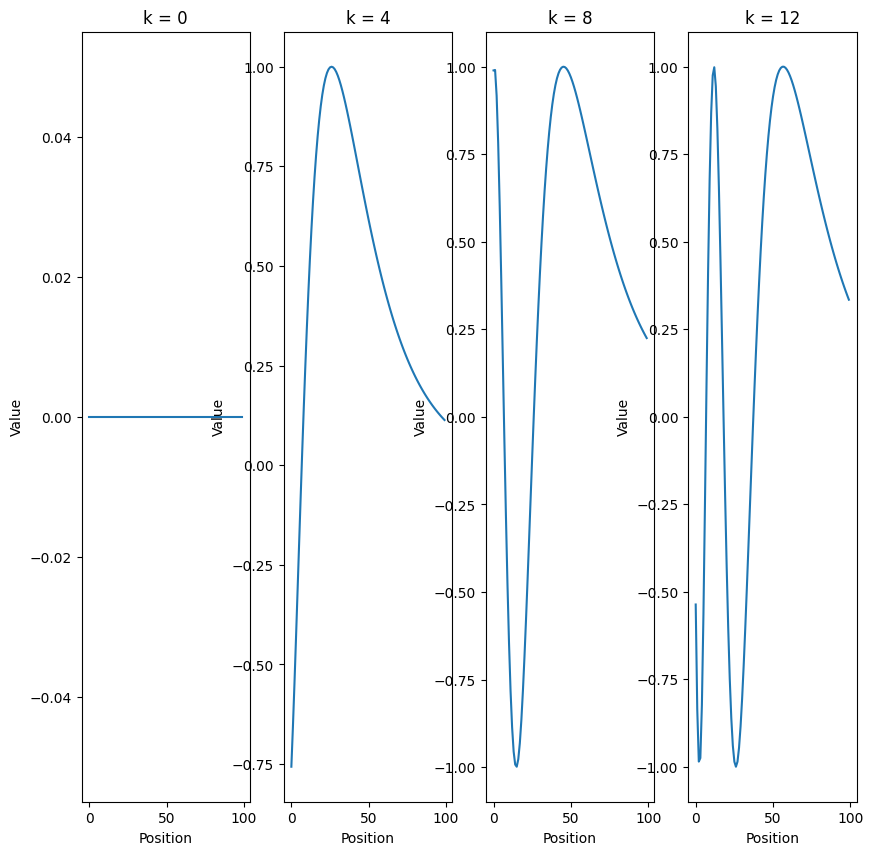

In [48]:
# plot positional encoding
def plot_sinusoidal_encoding(k, d=512, n=10000):
    x = np.arange(0, 100, 1)
    denominator = np.power(n, 2*x/d)
    y = np.sin(k/denominator)
    plt.plot(x, y)
    plt.xlabel('Position')
    plt.ylabel('Value')
    plt.title('k = {}'.format(k))

fig = plt.figure(figsize=(10, 10))
for i in range(len(words)):
    plt.subplot(141 + i)
    plot_sinusoidal_encoding(i*4)

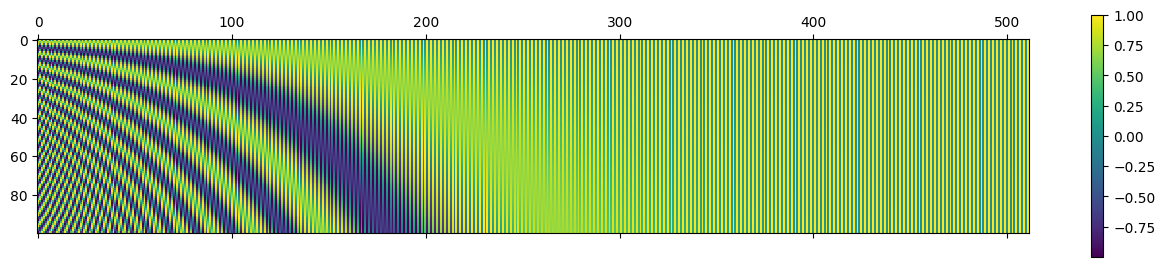

In [49]:
P = positional_encoding(seq_len=100, d=512, n=10000)
cax = plt.matshow(P)
plt.gcf().colorbar(cax)

In [46]:
# get the positional vectors for the sentence
pos_sentence = pos
print(pos_sentence)

[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00 ...  1.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 8.41470985e-01  5.40302306e-01  8.21856190e-01 ...  9.99999994e-01
   1.03663293e-04  9.99999995e-01]
 [ 9.09297427e-01 -4.16146837e-01  9.36414739e-01 ...  9.99999977e-01
   2.07326584e-04  9.99999979e-01]
 [ 1.41120008e-01 -9.89992497e-01  2.45085415e-01 ...  9.99999948e-01
   3.10989874e-04  9.99999952e-01]]


### Resources

- https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/
- https://www.youtube.com/watch?v=zxQyTK8quyY&ab_channel=StatQuestwithJoshStarmer

## The attention mechanism 

<center><img src="./images/Transformer.png" height="500" width="400"></center>

Vaswani, et al. 2017

Prior to Transformer models, RNNs were used to train Langauge models. RNN Language models, however, are limited by their architecture. That is, the output from the RNN earlier hidden states relies only on the current hidden state - which represents all relevant information. For long contextual depedencies, this architecture breaks down due to the nature of language and how people use langauge.

- Bahdanau attention (2014) for RNNs
    - Cho, Kyunghyun, et al. Learning Phrase Representations Using RNN Encoder-Decoder for Statistical Machine Translation. arXiv:1406.1078, arXiv, 2 Sept. 2014. arXiv.org, https://doi.org/10.48550/arXiv.1406.1078.
    - Sutskever, Ilya, et al. Sequence to Sequence Learning with Neural Networks. arXiv:1409.3215, arXiv, 14 Dec. 2014. arXiv.org, https://doi.org/10.48550/arXiv.1409.3215.
- For additional information, see this article: https://machinelearningmastery.com/the-bahdanau-attention-mechanism/


### Self-attention defined

The self-attention mechanism is a fundamental concept in the Transformer architecture, which is widely used in the field of Natural Language Processing (NLP). Before we delve into self-attention, let's establish the context of the Transformer architecture.

The Transformer architecture was introduced in the paper "Attention is All You Need" by Vaswani et al. (2017). It revolutionized the field of NLP by providing a new way to handle sequential data without relying on Recurrent Neural Networks (RNNs) or Convolutional Neural Networks (CNNs). The key development of the Transformer architecture is its optimization of the attention mechanism.

The self-attention mechanism allows the model to focus on different words in the input sequence when processing a particular word. In other words, when generating the representation of a word, the model considers not just the word itself but also other words in the sentence. This is done by calculating a weighted sum of all words in the sequence, where the weights are determined by the attention scores.

Thus, the self mechanism allows the model to capture long-range dependencies and relationships between words in the sequence, making it more effective at handling sequential data compared to traditional architectures like RNNs and LSTMs.

Mathematically, the self-attention mechanism can be defined as follows:

Let's say we have a sequence of words, represented by the vectors $X_1$, $X_2$, $\dots$, $X_n$. The self-attention of a word $X_i$ is calculated by:

1. Computing the attention scores between $X_i$ and all words in the sequence (including itself). This is usually done by taking the dot product of $X_i$ with each word, followed by a softmax operation to obtain the probabilities that sum up to 1. This gives us the weights.
2. Multiplying each word vector by its corresponding weight and summing up the results to obtain the self-attention output for $X_i$.

Formally, the self-attention output for $X_i$ can be written as:

$$\text{SelfAttention}(X_i) = \sum_{j=1}^{n} \text{softmax}(\text{score}(X_i, X_j)) \cdot X_j$$

where score($X_i$, $X_j$) is the attention score between $X_i$ and $X_j$.

Informally, the self-attention mechanism allows the model to look at all words in the sequence and decide which ones are important when processing a particular word.

Here's a simple Python code snippet that illustrates the self-attention mechanism:

```python
import numpy as np

def self_attention(X):
    # Compute attention scores
    scores = np.dot(X, X.T)
    
    # Apply softmax to get weights
    weights = np.exp(scores) / np.sum(np.exp(scores), axis=0)
    
    # Compute self-attention output
    self_attn = np.dot(weights, X)
    
    return self_attn
```

#### Query, key, value

Adapted from information retrieval systems:

* Query - think of recipe and ingredients
* Key - think of scanning your cupboard for ingredients
* Value - think of the ingredients you find


#### Attention


$$Attention(Q, K, V) = softmax(\frac{QK^T}{\sqrt{d_k}})V$$

Where $Q$, $K$, and $V$ are the query, key, and value matrices, respectively. The softmax function is applied to the scaled dot-product of the query and key matrices, divided by the square root of the dimension of the key matrix. The output is then multiplied by the value matrix to obtain the attention output.

or graphically:

<center><img src="https://raw.githubusercontent.com/nlp-with-transformers/notebooks/48e4a5e5c44b86e1593c0945a49af9675cfd7158//images/chapter03_attention-ops.png" height="200" width="1000"></center>

### Simplified Self-Attention

In [1]:
import torch

# Let's imagine we have the sentence "the quick brown fox jumps over the lazy dog"
# and we want to represent it as a tensor of word embeddings.

inputs = torch.tensor(
    [
        [0.32, 0.45, 0.12, 0.78],  # the
        [0.01, 0.67, 0.33, 0.45],  # quick
        [0.22, 0.11, 0.56, 0.89],  # brown
        [0.78, 0.45, 0.89, 0.67],  # fox
        [0.56, 0.34, 0.78, 0.23],  # jumps
        [0.90, 0.12, 0.45, 0.67],  # over
        [0.11, 0.34, 0.67, 0.78],  # the
        [0.56, 0.78, 0.23, 0.45],  # lazy
        [0.34, 0.56, 0.78, 0.12],  # dog
    ]
)

#### Step 1: Compute intermediate representations

In [10]:
query = inputs[1]
attn_scores_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(query, x_i)
attn_scores_2, len(attn_scores_2)

(tensor([0.6953, 0.7604, 0.6612, 0.9045, 0.5943, 0.5394, 0.8010, 0.8066, 0.6900]),
 9)

#### Step 2: Normalize the intermediate representations - attention weights

In [11]:
attn_weights_2 = attn_scores_2 / attn_scores_2.sum()
print(f'Attention weights: {attn_weights_2}')
print(f'Sum: {attn_weights_2.sum()}')

Attention weights: tensor([0.1078, 0.1178, 0.1025, 0.1402, 0.0921, 0.0836, 0.1241, 0.1250, 0.1069])
Sum: 0.9999998807907104


In [12]:
## softmax

def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

attn_weights_2 = softmax(attn_scores_2)
print(f'Attention weights: {attn_weights_2}')
print(f'Sum: {attn_weights_2.sum()}')

Attention weights: tensor([0.1081, 0.1154, 0.1045, 0.1333, 0.0977, 0.0925, 0.1202, 0.1208, 0.1075])
Sum: 1.0


In [13]:
# or using the built-in function of pytorch
attn_weights_2 = torch.nn.functional.softmax(attn_scores_2, dim=0)
print(f'Attention weights: {attn_weights_2}')
print(f'Sum: {attn_weights_2.sum()}')

Attention weights: tensor([0.1081, 0.1154, 0.1045, 0.1333, 0.0977, 0.0925, 0.1202, 0.1208, 0.1075])
Sum: 0.9999999403953552


#### Step 3: Compute the context vector

In [14]:
query = inputs[1] # second input token is the query
context_vector_2 = torch.zeros(query.shape)
for i, x_i in enumerate(inputs):
    context_vector_2 += attn_weights_2[i] * x_i
print(f'Context vector: {context_vector_2}')

Context vector: tensor([0.4181, 0.4371, 0.5382, 0.5640])


#### Step 3 contd.: Compute attention weights for all input tokens

In [2]:
attn_weights = torch.empty(9, 9)
for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_weights[i, j] = torch.dot(x_i, x_j)
print(f'Attention scores: {attn_weights}')

Attention scores: tensor([[0.9277, 0.6953, 0.8813, 1.0815, 0.6052, 0.9186, 0.8770, 0.9088, 0.5480],
        [0.6953, 0.7604, 0.6612, 0.9045, 0.5943, 0.5394, 0.8010, 0.8066, 0.6900],
        [0.8813, 0.6612, 1.1662, 1.3158, 0.8021, 1.0595, 1.1310, 0.7383, 0.6800],
        [1.0815, 0.9045, 1.3158, 2.0519, 1.4381, 1.6054, 1.3577, 1.2940, 1.2918],
        [0.6052, 0.5943, 0.8021, 1.4381, 1.0905, 1.0499, 0.8792, 0.8617, 1.0168],
        [0.9186, 0.5394, 1.0595, 1.6054, 1.0499, 1.4758, 0.9639, 1.0026, 0.8046],
        [0.8770, 0.8010, 1.1310, 1.3577, 0.8792, 0.9639, 1.1850, 0.8319, 0.8440],
        [0.9088, 0.8066, 0.7383, 1.2940, 0.8617, 1.0026, 0.8319, 1.1774, 0.8606],
        [0.5480, 0.6900, 0.6800, 1.2918, 1.0168, 0.8046, 0.8440, 0.8606, 1.0520]])


In [4]:
### optimize the above with matrix multiplication
attn_scores = inputs @ inputs.T
print(f'Attention scores: {attn_weights}')

Attention scores: tensor([[0.9277, 0.6953, 0.8813, 1.0815, 0.6052, 0.9186, 0.8770, 0.9088, 0.5480],
        [0.6953, 0.7604, 0.6612, 0.9045, 0.5943, 0.5394, 0.8010, 0.8066, 0.6900],
        [0.8813, 0.6612, 1.1662, 1.3158, 0.8021, 1.0595, 1.1310, 0.7383, 0.6800],
        [1.0815, 0.9045, 1.3158, 2.0519, 1.4381, 1.6054, 1.3577, 1.2940, 1.2918],
        [0.6052, 0.5943, 0.8021, 1.4381, 1.0905, 1.0499, 0.8792, 0.8617, 1.0168],
        [0.9186, 0.5394, 1.0595, 1.6054, 1.0499, 1.4758, 0.9639, 1.0026, 0.8046],
        [0.8770, 0.8010, 1.1310, 1.3577, 0.8792, 0.9639, 1.1850, 0.8319, 0.8440],
        [0.9088, 0.8066, 0.7383, 1.2940, 0.8617, 1.0026, 0.8319, 1.1774, 0.8606],
        [0.5480, 0.6900, 0.6800, 1.2918, 1.0168, 0.8046, 0.8440, 0.8606, 1.0520]])


In [5]:
#### verify the results
attn_weights = torch.nn.functional.softmax(attn_scores, dim=1)
print(f'Summed attention scores: {attn_weights}')

Summed attention scores: tensor([[0.1213, 0.0961, 0.1158, 0.1415, 0.0879, 0.1202, 0.1153, 0.1190, 0.0830],
        [0.1081, 0.1154, 0.1045, 0.1333, 0.0977, 0.0925, 0.1202, 0.1208, 0.1075],
        [0.1024, 0.0822, 0.1362, 0.1582, 0.0946, 0.1224, 0.1315, 0.0888, 0.0837],
        [0.0791, 0.0662, 0.0999, 0.2087, 0.1130, 0.1335, 0.1042, 0.0978, 0.0976],
        [0.0781, 0.0772, 0.0951, 0.1796, 0.1268, 0.1218, 0.1027, 0.1009, 0.1178],
        [0.0931, 0.0638, 0.1072, 0.1851, 0.1062, 0.1626, 0.0975, 0.1013, 0.0831],
        [0.0979, 0.0908, 0.1263, 0.1584, 0.0982, 0.1068, 0.1333, 0.0936, 0.0948],
        [0.1058, 0.0955, 0.0892, 0.1555, 0.1009, 0.1162, 0.0979, 0.1383, 0.1008],
        [0.0790, 0.0911, 0.0902, 0.1663, 0.1263, 0.1021, 0.1062, 0.1080, 0.1308]])


In [6]:
example_row_sum = attn_weights[1].sum()
print(f'Example row sum: {example_row_sum}')
print(f'All row sums: {attn_weights.sum(dim=1)}')

Example row sum: 0.9999999403953552
All row sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


#### Step 4: Compute the attention weights for all context vectors

In [7]:
all_context_vectors = attn_weights @ inputs
print(f'All context vectors: {all_context_vectors}')

All context vectors: tensor([[0.4405, 0.4182, 0.5290, 0.5899],
        [0.4181, 0.4371, 0.5382, 0.5640],
        [0.4427, 0.3950, 0.5592, 0.6004],
        [0.4935, 0.4056, 0.5897, 0.5727],
        [0.4752, 0.4155, 0.5856, 0.5510],
        [0.5000, 0.3941, 0.5665, 0.5858],
        [0.4340, 0.4076, 0.5628, 0.5873],
        [0.4592, 0.4372, 0.5395, 0.5608],
        [0.4550, 0.4301, 0.5805, 0.5389]])


### Implement the self-attention mechanism

In [26]:
import torch.nn as nn

class SelfAttention(nn.Module):
    def __init__(self, d_in, d_out):
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Parameter(torch.rand(d_in, d_out))
        self.W_key = nn.Parameter(torch.rand(d_in, d_out))
        self.W_value = nn.Parameter(torch.rand(d_in, d_out))

    def forward(self, x):
        keys = x @ self.W_key
        queries = x @ self.W_query
        values = x @ self.W_value
        attn_scores = queries @ keys.T # dot product
        attn_weights = torch.nn.functional.softmax(
            attn_scores / keys.shape[-1]**0.5, dim=-1
            ) # scaling by sqrt(d_out)
        context_vec = attn_weights @ values
        return context_vec 

In [27]:
torch.manual_seed(42)

d_in = inputs.shape[1]
d_out = 2
print(d_in, d_out)

4 2


In [28]:
self_attn = SelfAttention(d_in, d_out)
print(self_attn(inputs))

tensor([[0.8595, 1.2687],
        [0.8433, 1.2536],
        [0.8571, 1.2662],
        [0.9249, 1.3323],
        [0.8806, 1.2878],
        [0.9000, 1.3068],
        [0.8592, 1.2686],
        [0.8866, 1.2946],
        [0.8695, 1.2775]], grad_fn=<MmBackward0>)


By training the weight matrices $W^Q$, $W^K$, and $W^V$ to learn the optimal attention scores, the self-attention mechanism can effectively capture the relationships between words in the input sequence.

### Improved Self-Attention

In [31]:
import torch.nn as nn

class SelfAttention(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self, x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        attn_scores = queries @ keys.T
        attn_weights = torch.nn.functional.softmax(
            attn_scores / keys.shape[-1]**0.5, dim=1
            )
        context_vec = attn_weights @ values
        return context_vec

In [32]:
# Let's test the new implementation
self_attn = SelfAttention(d_in, d_out)
print(self_attn(inputs))

tensor([[0.0734, 0.0819],
        [0.0714, 0.0825],
        [0.0703, 0.0814],
        [0.0682, 0.0807],
        [0.0698, 0.0806],
        [0.0724, 0.0802],
        [0.0690, 0.0819],
        [0.0727, 0.0818],
        [0.0692, 0.0813]], grad_fn=<MmBackward0>)
